In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow.keras as K
from tensorflow.keras.layers import Dense, Flatten


2023-12-30 13:54:43.218693: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-30 13:54:43.218759: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-30 13:54:43.221654: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-30 13:54:43.237330: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-30 13:54:43.955810: W tensorflow/compiler/tf2

In [2]:
((train_data, train_labels),(test_data, test_labels)) = tf.keras.datasets.mnist.load_data()

In [3]:
train_data = train_data/np.float32(255)
train_labels = train_labels.astype(np.int32)  
test_data = test_data/np.float32(255)
test_labels = test_labels.astype(np.int32)


In [4]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=int32)

In [5]:
model = K.Sequential([
                      # Dense(64,  activation='relu'),
                      # Dense(32,  activation='relu'),
                      Flatten(input_shape=(28, 28)),
                      Dense(10, activation='sigmoid')
])
model.summary()

2023-12-30 13:56:03.669826: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-30 13:56:03.669912: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:04:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-30 13:56:03.723628: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-30 13:56:03.723664: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:04:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-30 13:56:03.723686: I external/local_xla/xla/stream_executor

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [7]:
history = model.fit(x=train_data,y=train_labels, epochs=50, verbose=1, validation_split=0.2)

Epoch 1/50


/home/david/.local/lib/python3.10/site-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-12-30 13:57:37.884353: I external/local_xla/xla/service/service.cc:168] XLA service 0x557498334af0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-30 13:57:37.884390: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2023-12-30 13:57:37.884397: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (1): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2023-12-30 13:57:37.897182: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-12-

1500/1500 [==============================] - 11s 4ms/step - loss: 0.5044 - accuracy: 0.8697 - val_loss: 0.3176 - val_accuracy: 0.9113
Epoch 2/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3177 - accuracy: 0.9117 - val_loss: 0.2901 - val_accuracy: 0.9188
Epoch 3/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2934 - accuracy: 0.9176 - val_loss: 0.2749 - val_accuracy: 0.9237
Epoch 4/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2815 - accuracy: 0.9217 - val_loss: 0.2709 - val_accuracy: 0.9261
Epoch 5/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2733 - accuracy: 0.9236 - val_loss: 0.2662 - val_accuracy: 0.9273
Epoch 6/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2681 - accuracy: 0.9249 - val_loss: 0.2702 - val_accuracy: 0.9249
Epoch 7/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2639 - accuracy: 0.9269 - val_loss: 0.2645 - val_accuracy: 0.9283
Ep

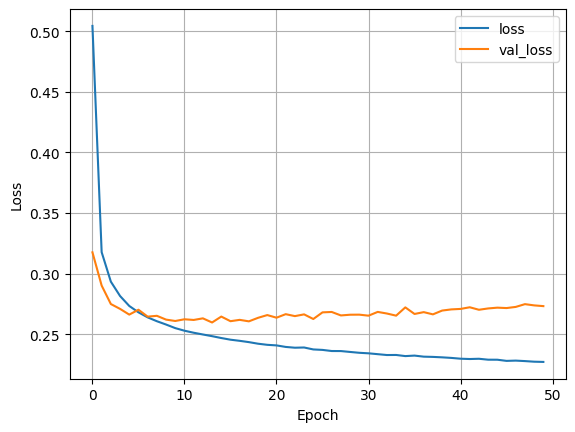

In [8]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

In [9]:
predictions = model.predict(test_data)

313/313 [==============================] - 1s 2ms/step


In [10]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("Pred {} Conf: {:2.0f}% True ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

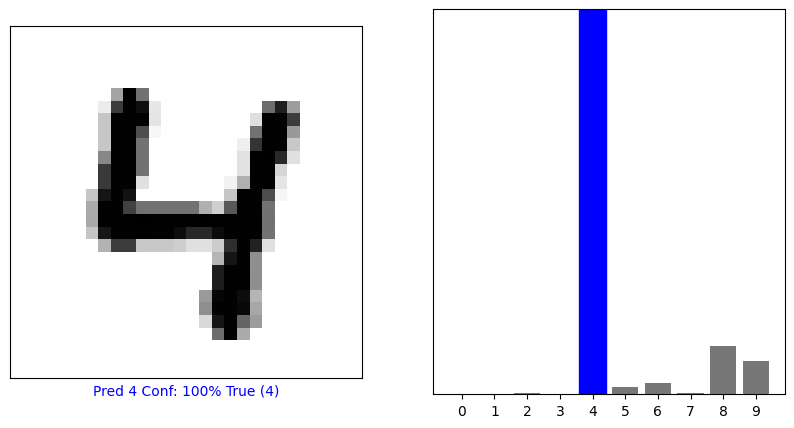

In [11]:
i = 56
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_data)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

In [17]:
better_model = K.Sequential([
                      Flatten(input_shape=(28, 28)),
                      Dense(128,  activation='relu'),
                      Dense(64,  activation='relu'),
                      Dense(10, activation='softmax')
])
better_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
better_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
history = better_model.fit(x=train_data,y=train_labels, epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2601 - accuracy: 0.9229 - val_loss: 0.1367 - val_accuracy: 0.9605
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1087 - accuracy: 0.9664 - val_loss: 0.1118 - val_accuracy: 0.9670
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0747 - accuracy: 0.9770 - val_loss: 0.1134 - val_accuracy: 0.9653
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0578 - accuracy: 0.9814 - val_loss: 0.1010 - val_accuracy: 0.9701
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0444 - accuracy: 0.9855 - val_loss: 0.0896 - val_accuracy: 0.9737
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0348 - accuracy: 0.9883 - val_loss: 0.0952 - val_accuracy: 0.9739
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0292 - accuracy: 0.9906 - val_loss: 0.0972 - val_accuracy:

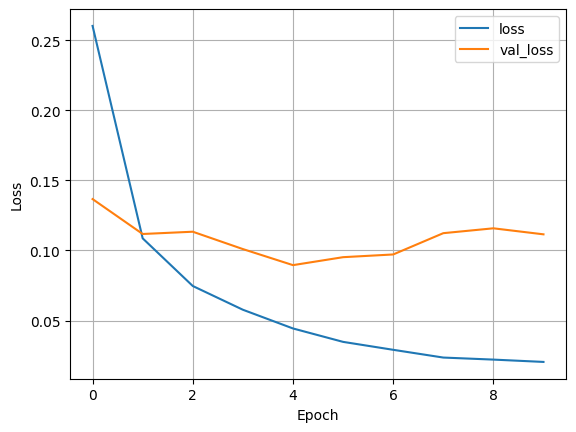

In [20]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

313/313 [==============================] - 1s 2ms/step


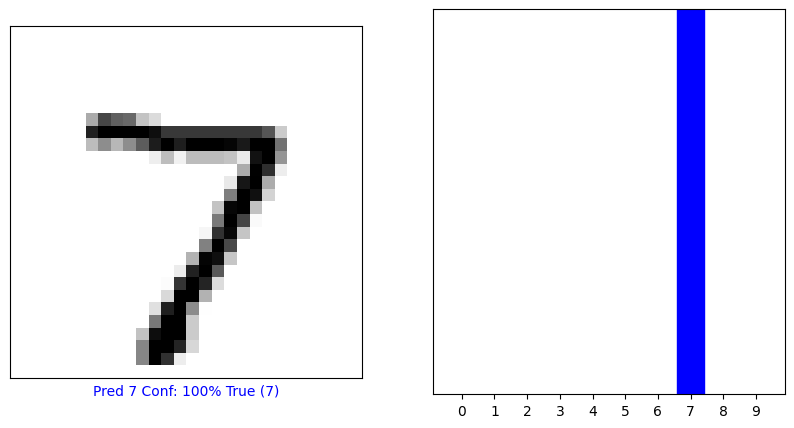

In [16]:
predictions = better_model.predict(test_data)
i = 0
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_data)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()